In [ ]:
%pip install pandas
import pandas as pd

In [ ]:
#https://stats.oecd.org/SDMX-JSON/data/CITIES/AUS+AUS01+AUS02+AUS03+AUS04.POP_DEN_HINTER/all?startTime=2019&endTime=2021&contentType=csv&csv This url works
#The following API is for all USA metro areas in OECD cities database. 
urlmetro = 'https://stats.oecd.org/SDMX-JSON/data/CITIES/USA+USA01+USA02+USA03+USA04+USA05+USA06+USA07+USA08+USA09+USA10+USA11+USA12+USA13+USA14+USA15+USA16+USA17+USA18+USA19+USA20+USA21+USA22+USA23+USA24+USA25+USA26+USA27+USA28+USA29+USA30+USA31+USA32+USA33+USA34+USA35+USA36+USA37+USA38+USA39+USA40+USA41+USA42+USA43+USA44+USA45+USA46+USA47+USA48+USA49+USA50+USA51+USA52+USA53+USA54+USA55+USA56+USA57+USA58+USA59+USA60+USA61+USA62+USA63+USA64+USA65+USA66+USA67+USA68+USA69+USA70+USA71+USA72+USA73+USA74+USA75+USA76+USA77+USA78+USA79+USA80+USA81+USA82+USA83+USA84+USA85+USA86+USA87+USA88+USA89+USA90+USA91+USA92+USA93+USA94+USA95+USA96+USA97+USA98+USA99+USA100+USA101+USA102+USA103+USA104+USA105+USA106+USA107+USA108+USA109+USA110+USA111+USA112+USA113+USA114+USA115+USA116+USA117+USA118+USA119+USA120+USA121+USA122+USA123+USA124+USA125+USA126+USA127+USA128+USA129+USA130+USA131+USA132+USA133+USA134+USA135+USA136+USA137+USA138+USA139+USA140+USA141+USA142+USA143+USA144+USA145+USA146+USA147+USA148+USA149+USA150+USA151+USA152+USA153+USA154+USA155+USA156+USA157+USA158+USA160+USA161+USA162+USA170.POP_DEN+T_T+POP_TOT_GI+T_T_SH_NAT+T_Y15_64+EMP_RA_15_MAX+EMP_RA_15_MAX_GR_2007+GDP_REAL_PPP+GDP_SH_NAT+GDP_PC_REAL_PPP+EMP_IND_TOTAL+GDP_PW_REAL_PPP+XDSL+SPEX_25_CORE+TREECOVER_SHARE_CORE/all?startTime=2000&endTime=2021&contentType=csv&csv'
dfmetro = pd.read_csv(urlmetro)

In [ ]:
#Tidy up the column names and specific columns to make it easier to conduct analysis.
import matplotlib as plt
dfmetro.columns = dfmetro.columns.str.lower()
dfmetro.columns = dfmetro.columns.str.replace(' ', '_')
dfmetro.variables = dfmetro.variables.str.lower()
dfmetro.variables = dfmetro.variables.str.replace(' ', '_')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('(Greater)','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace(r"\(.*?\)","")
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('[\([{})\]]','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('-','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace(' ','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('[\([{})\]]','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.lower()


#print(dfmetro.variables.unique())
h = dfmetro[(dfmetro['variables'] == 'working_age_population_group_(15-64)') & (dfmetro.year == 2018)]
h.hist(column='value',bins=100) #This shows that population density is not normally distributed with most of the data on the left handside of the distribution.
print(h.value.mean()) #The mean population density is 167.1
print(h.value.median()) #The median population density is 126.5
#WB data for the USA shows that population density (population per km2 of land) in 2020 was 36. Therefore, this dataset of cities is significantly larger than the country as a whole.
dfmetro.columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
x = dfmetro[(dfmetro['variables'] == 'growth/shrinking_index_of_the_total_population_(2001=100)') & (dfmetro.year == 2019)]
x['diff_avg'] = ((x['value'] - x.value.median())/x.value.median())
y = dfmetro[(dfmetro['variables'] == 'labour_productivity_(gdp_per_worker_in_usd,_constant_prices,_constant_ppp,_base_year_2015)') & (dfmetro.year == 2019)]
y['diff_avg'] = ((y['value'] - y.value.mean())/y.value.median())
mdf = pd.merge(x,y,left_on='metro_id',right_on='metro_id')
mdf = mdf.sort_values('diff_avg_x',ascending=False)


from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(mdf[['value_x']], mdf[['diff_avg_y']])

#xfit = np.linspace(-1, 7, 162)
#yfit = model.predict(mdf[['value_x']])

#plt.scatter(mdf['value_x'],mdf['diff_avg_y'])
#plt.plot(xfit, yfit,color='red')
sns.regplot(data=mdf,x='value_x',y='diff_avg_y')
mdf.metropolitan_areas_x.sort_values(ascending=True).unique()


In [ ]:
dfeduc = pd.read_excel(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Datastore\US_educationa_attainment_metro.xlsx')
dfeduc.columns = dfeduc.columns.str.lower()
dfeduc.columns = dfeduc.columns.str.replace(' ','_')
#dfeduc[['name','state_abbrv']] = dfeduc['name'].str.split(',',1,expand=True)
dfeduc.name = dfeduc.name.str.replace('-','')
dfeduc.name = dfeduc.name.str.replace(' ','')
dfeduc.name = dfeduc.name.str.lower()
dfeduc.name.sort_values(ascending=True).unique()
dfeduc

In [ ]:
mmdf = pd.merge(mdf,dfeduc,left_on='metropolitan_areas_x',right_on='name')
mmdf

In [342]:
#The best way to work with an api from Bea is to use the xml format over the json format.
#This is because vegalite cannot read large numbers in the json format of the api because there are commas in the numbers.
#Therefore I found it better to read the data in an xml format in Jupyter notebook and then conduct the analysis before taking the data into vegalite.

#https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetParameterValuesFiltered&datasetname=Regional&TargetParameter=LineCode&TableName=CAGDP1&ResultFormat=xml


#CAGDP1-3 GDP in current USD.
df = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAGDP1&LineCode=3&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df
#CAINC30-100 Total population.
df1 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=100&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df1
#CAINC30-190 Wages and Salaries.
df2 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=190&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df2
#CAINC30-300 Average Wages and Salaries.
df3 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=300&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df3
#CAINC30-300 Average Wages and Salaries.
df4 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=300&Year=2018&GeoFips=MIC&ResultFormat=xml',xpath="//Data", encoding='cp1252') #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df4

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,CAINC30-300,10100,"Aberdeen, SD (Micropolitan Statistical Area)",2018,Dollars,0,"42,252",None
1,CAINC30-300,10140,"Aberdeen, WA (Micropolitan Statistical Area)",2018,Dollars,0,"41,710",None
2,CAINC30-300,10220,"Ada, OK (Micropolitan Statistical Area)",2018,Dollars,0,"44,309",None
3,CAINC30-300,10300,"Adrian, MI (Micropolitan Statistical Area)",2018,Dollars,0,"44,210",None
4,CAINC30-300,10460,"Alamogordo, NM (Micropolitan Statistical Area)",2018,Dollars,0,"43,876",None
...,...,...,...,...,...,...,...,...
538,CAINC30-300,49300,"Wooster, OH (Micropolitan Statistical Area)",2018,Dollars,0,"46,472",None
539,CAINC30-300,49380,"Worthington, MN (Micropolitan Statistical Area)",2018,Dollars,0,"43,381",None
540,CAINC30-300,49460,"Yankton, SD (Micropolitan Statistical Area)",2018,Dollars,0,"43,023",None
541,CAINC30-300,49780,"Zanesville, OH (Micropolitan Statistical Area)",2018,Dollars,0,"41,945",None


In [341]:
df4.DataValue = df4.DataValue.str.replace(',','')
df4.DataValue = df4.DataValue.astype(float)
df4.DataValue.mean()

41872.86003683241

C:\Users\vw191\Downloads\annaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\vw191\Downloads\annaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\vw191\Downloads\annaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

47956650.302083336
12539998.0
         Code  GeoFips                                            GeoName  \
0    CAGDP1-3      998               United States (Metropolitan Portion)   
1    CAGDP1-3    10180        Abilene, TX (Metropolitan Statistical Area)   
2    CAGDP1-3    10420          Akron, OH (Metropolitan Statistical Area)   
3    CAGDP1-3    10500         Albany, GA (Metropolitan Statistical Area)   
4    CAGDP1-3    10540  Albany-Lebanon, OR (Metropolitan Statistical A...   
..        ...      ...                                                ...   
380  CAGDP1-3    49420         Yakima, WA (Metropolitan Statistical Area)   
381  CAGDP1-3    49620   York-Hanover, PA (Metropolitan Statistical Area)   
382  CAGDP1-3    49660  Youngstown-Warren-Boardman, OH-PA (Metropolita...   
383  CAGDP1-3    49700      Yuba City, CA (Metropolitan Statistical Area)   
384  CAGDP1-3    49740           Yuma, AZ (Metropolitan Statistical Area)   

     TimePeriod               CL_UNIT  UNIT_M

C:\Users\vw191\Downloads\annaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


48700.307291666664
47080.5
         Code  GeoFips                                            GeoName  \
0    CAGDP1-3      998               United States (Metropolitan Portion)   
1    CAGDP1-3    10180        Abilene, TX (Metropolitan Statistical Area)   
2    CAGDP1-3    10420          Akron, OH (Metropolitan Statistical Area)   
3    CAGDP1-3    10500         Albany, GA (Metropolitan Statistical Area)   
4    CAGDP1-3    10540  Albany-Lebanon, OR (Metropolitan Statistical A...   
..        ...      ...                                                ...   
380  CAGDP1-3    49420         Yakima, WA (Metropolitan Statistical Area)   
381  CAGDP1-3    49620   York-Hanover, PA (Metropolitan Statistical Area)   
382  CAGDP1-3    49660  Youngstown-Warren-Boardman, OH-PA (Metropolita...   
383  CAGDP1-3    49700      Yuba City, CA (Metropolitan Statistical Area)   
384  CAGDP1-3    49740           Yuma, AZ (Metropolitan Statistical Area)   

     TimePeriod               CL_UNIT  UNIT_MULT

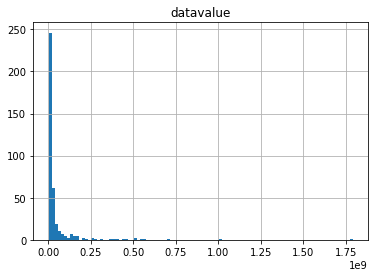

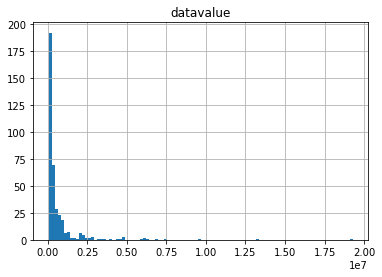

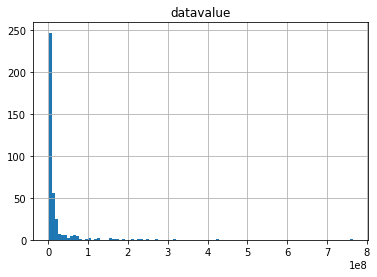

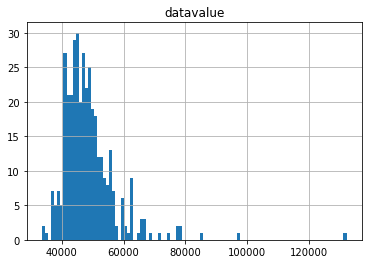

In [316]:
#Automates finding simple mean and median values for each df as well as data cleaning. The for loop removes the , from the datavalue column and converts it to a float.
for j in [df, df1, df2, df3]:
    i = j
    i = i.loc[1:,:]
    i.columns = i.columns.astype('str').str.lower()
    i.columns = i.columns.astype('str').str.replace(' ','_')
    i.datavalue = i.datavalue.astype('str').str.replace(",",'')
    i.datavalue = i.datavalue.astype('float')
    i.geoname = i.geoname.str.replace(' ','')
    i.geoname = i.geoname.str.lower()
    h = i
    h.hist(column='datavalue',bins=100) 
    print(h.datavalue.mean())
    print(h.datavalue.median()) 
    print(df)


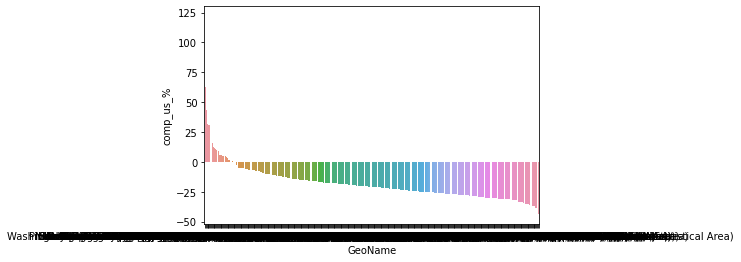

In [318]:
df3.DataValue = df3.DataValue.astype(str).str.replace(',','')
df3.DataValue = df3.DataValue.astype(float)
df3['comp_us_%'] = ((df3['DataValue'] - df3.DataValue[0])/df3.DataValue[0])*100
df3
df3 = df3.sort_values('DataValue',ascending=False)
sns.barplot(data=df3,x='GeoName',y='comp_us_%')

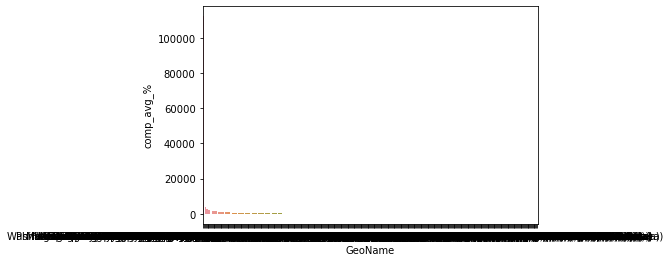

In [325]:
df1.DataValue = df1.DataValue.astype(str).str.replace(',','')
df1.DataValue = df1.DataValue.astype(float)
df1['comp_avg_%'] = ((df1['DataValue'] - df1.DataValue.median())/df1.DataValue.median())*100
df1
df1 = df1.sort_values('comp_avg_%',ascending=False)
sns.barplot(data=df1,x='GeoName',y='comp_avg_%')

(0.0, 1000.0)

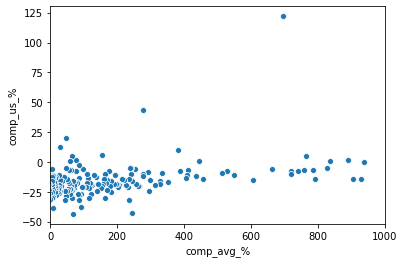

In [328]:
mdf = pd.merge(df1,df3,left_on='GeoName',right_on='GeoName')
mdf
sns.scatterplot(data = mdf,x='comp_avg_%',y='comp_us_%')
plt.xlim(0,1000)